<h2>Music Genre Recognition</h2>

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, BatchNormalization, Conv2D, MaxPool2D, Dropout

import matplotlib.pyplot as plt

import imageio
import glob
import os
from sklearn.model_selection import train_test_split

Below we have defined a funtion that will take the .png file path as an input and convert it to a grayscale numpy array that can be used as input for the CNN. 

In [8]:
def to_gray(path):
  im = imageio.imread(path)
  # Convert from RGB to grayscale
  im = np.dot(im[...,:3], [0.299, 0.587, 0.114])
  
  # Remove white space
  no_space = im[35:253, 54:390]

  return no_space

Create dictionary to convert genre strings to integer indices.

In [4]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

genre_ind = { g:i for i,g in enumerate(genres) }
ind_genre = { i:g for i,g in enumerate(genres) }

print(genre_ind)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


The data files are organized such that each genre is a seperate folder of 100 images. The code below goes through each file and creates a list of numpy arrays as well as a list of genre labels. We are creating three inputs from each sample.

In [9]:
path = '/content/gdrive/My Drive/INFO518/Project/Data/images_original/'
files = glob.glob(os.path.join(os.getcwd(), path, '*'))

img_lst = []
y = []
for path2 in files:
  ims = glob.glob(os.path.join(os.getcwd(), path2, '*.png'))
  for im in ims:
    # Use file name to get the genre name and append it to y
    y.extend([genre_ind[im.split("/")[-2]], genre_ind[im.split("/")[-2]], genre_ind[im.split("/")[-2]]])
    full_img = to_gray(im)
    # Create three 218x112 inputs (3 per sample)
    img_lst.append(full_img[:, :112])
    img_lst.append(full_img[:, 112:224])
    img_lst.append(full_img[:, 224:])

In [10]:
X = np.array(img_lst)
y = np.array(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Below we will display the images of two different samples along with the genre.

reggae


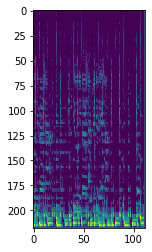

In [12]:
print(ind_genre[y_train[0]]) 
plt.imshow(X_train[0])
plt.show()

pop


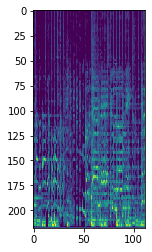

In [13]:
print(ind_genre[y_train[100]]) 
plt.imshow(X_train[100][:218,:])
plt.show()

In [14]:
X_train = X_train.reshape(X_train.shape[0], 218, 112, 1)
X_test = X_test.reshape(X_test.shape[0], 218, 112, 1)
input_shape = (218, 112, 1)

Create model.

In [26]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = input_shape))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (2, 2), activation = "relu"))
model.add(MaxPool2D((2, 2), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(16, (1, 1), activation = "relu"))
model.add(MaxPool2D((1, 1), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 216, 110, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 108, 55, 64)      0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 108, 55, 64)      256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 53, 32)       18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 27, 32)       0         
 2D)                                                             
                                                      

In [27]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x=X_train,y=y_train, epochs=11, validation_split=0.2)

Epoch 1/11
60/60 [==============================] - 126s 2s/step - loss: 2.0788 - accuracy: 0.2686 - val_loss: 5.1635 - val_accuracy: 0.1333
Epoch 2/11
60/60 [==============================] - 120s 2s/step - loss: 1.6068 - accuracy: 0.4293 - val_loss: 2.4057 - val_accuracy: 0.2396
Epoch 3/11
60/60 [==============================] - 120s 2s/step - loss: 1.4438 - accuracy: 0.4919 - val_loss: 1.5614 - val_accuracy: 0.4208
Epoch 4/11
60/60 [==============================] - 118s 2s/step - loss: 1.2097 - accuracy: 0.5759 - val_loss: 1.2493 - val_accuracy: 0.5792
Epoch 5/11
60/60 [==============================] - 116s 2s/step - loss: 1.0510 - accuracy: 0.6322 - val_loss: 1.3680 - val_accuracy: 0.5354
Epoch 6/11
60/60 [==============================] - 118s 2s/step - loss: 0.8705 - accuracy: 0.6917 - val_loss: 1.1671 - val_accuracy: 0.5958
Epoch 7/11
60/60 [==============================] - 116s 2s/step - loss: 0.7190 - accuracy: 0.7543 - val_loss: 1.1326 - val_accuracy: 0.6396
Epoch 8/11
60

In [28]:
acc = model.evaluate(X_test, y_test)[1]

19/19 [==============================] - 6s 327ms/step - loss: 1.6467 - accuracy: 0.5600


Display an example of a prediction, true value, and image.

1/1 [==============================] - 0s 196ms/step
0 0.22007866
1 5.152243e-06
2 0.0007312161
3 0.17557332
4 0.001991943
5 2.3402072e-05
6 0.0040788706
7 0.00019060737
8 5.0130428e-05
9 0.5972767
--------------
Prediction: rock ( 9 )
Actual Genre: disco ( 3 )


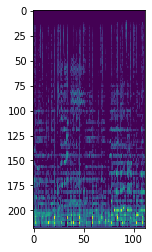

In [30]:
image_index = 203
plt.imshow(X_test[image_index].reshape(218, 112))
pred = model.predict(X_test[image_index].reshape(1, 218, 112, 1))
for i in range(pred.shape[1]):
    print (i,pred[0,i])
print('--------------')
print("Prediction:", ind_genre[pred.argmax()], "(", pred.argmax(), ")")
print("Actual Genre:", ind_genre[y_test[image_index]], "(", y_test[image_index], ")")

Create functions to plot loss and accuracy history, then plot.

In [31]:
def plotloss(history,both = True):
    plt.plot(history.history['loss'])
    if both:
        plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    if both:
        plt.legend(['train', 'validation'])
    plt.show()

def plotacc(history,both = True):
    plt.plot(history.history['accuracy'])
    if both:
        plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    if both:
        plt.legend(['train', 'validation'])
    plt.show()

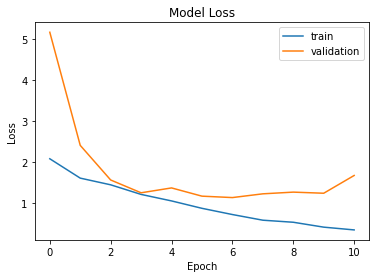

In [32]:
plotloss(history,True)

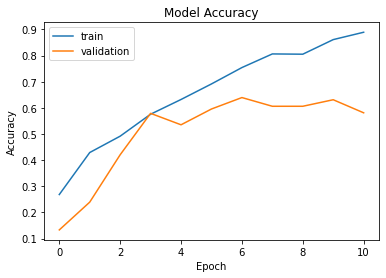

In [33]:
plotacc(history,True)

Calculate and report class-wise accuracies.

In [34]:
accuracies = []
for i in range(10):
  genre_index = np.where(y_test == i)
  y_test_genre = y_test[genre_index]
  X_test_genre = X_test[genre_index]
  accuracies.append(model.evaluate(X_test_genre, y_test_genre)[1])

2/2 [==============================] - 1s 262ms/step - loss: 1.9222 - accuracy: 0.4655


In [ ]:
print("Overall Accuracy:", round(acc, 4))
print("---------------------------")
print("Class-wise accuracies for")
for i in range(10):
  print(ind_genre[i], "samples:", round(accuracies[i], 4))